In [45]:
import matplotlib.pyplot as plt

In [46]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
balance_scale = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
X = balance_scale.data.features 
y = balance_scale.data.targets 

In [47]:
y.value_counts()

class
L        288
R        288
B         49
Name: count, dtype: int64

In [48]:
y.replace({'L':0, 'R':1, 'B':2}, inplace=True)
y.value_counts()

C:\Users\fabio\AppData\Local\Temp\ipykernel_3896\1143126376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({'L':0, 'R':1, 'B':2}, inplace=True)


class
0        288
1        288
2         49
Name: count, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, stratify=y)

In [6]:
X_treino

,right-distance,right-weight,left-distance,left-weight
196,2,5,3,2
541,2,4,2,5
188,4,3,3,2
60,1,3,3,1
330,1,2,4,3
...,...,...,...,...
1,2,1,1,1
514,5,3,1,5
558,4,2,3,5
148,4,5,1,2


In [50]:
X_treino = X_treino.to_numpy()
X_teste = X_teste.to_numpy()

In [7]:
X_treino.shape

(500, 4)

In [51]:
from tensorflow.keras.utils import to_categorical

y_treino = to_categorical(y_treino)
y_teste = to_categorical(y_teste)

In [52]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

modelo = Sequential()

modelo.add(Dense(50, kernel_initializer="normal", input_dim=4, activation='relu'))
modelo.add(Dense(50, kernel_initializer="normal", activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(50, kernel_initializer="normal", activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(y_treino.shape[1], kernel_initializer="normal", activation='softmax'))


loss = CategoricalCrossentropy()
metrics=[Accuracy()]

otimizadores = [SGD(), 
                SGD(momentum=0.9), 
                SGD(nesterov=True, momentum=0.9), 
                RMSprop(), 
                RMSprop(momentum=0.9),
                Adam(),
                Adam(amsgrad=True),
                AdamW(),
                Adadelta(), 
                Adagrad(),
                Adamax(),
                Nadam(),
                Adafactor()
                ]

historico = []
for otimizador in otimizadores:
    modelo.compile(
        optimizer=otimizador,
        loss=loss,
        metrics=metrics
    )
    aux = modelo.fit(X_treino, y_treino, batch_size=500,verbose=0 ,epochs=600, validation_data=(X_teste, y_teste))
    historico.append(aux)

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
import numpy as np

epochs = np.arange(1, 601)
len(epochs)

otimizadores[1].name = 'SGD com momentum'
otimizadores[2].name = 'SGD com nesterov momentum'
otimizadores[4].name = 'RMSprop com nesterov momentum'
otimizadores[6].name = 'AmsGrad'

C:\Users\fabio\AppData\Local\Temp\ipykernel_3896\8177567.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set1', len(historico))


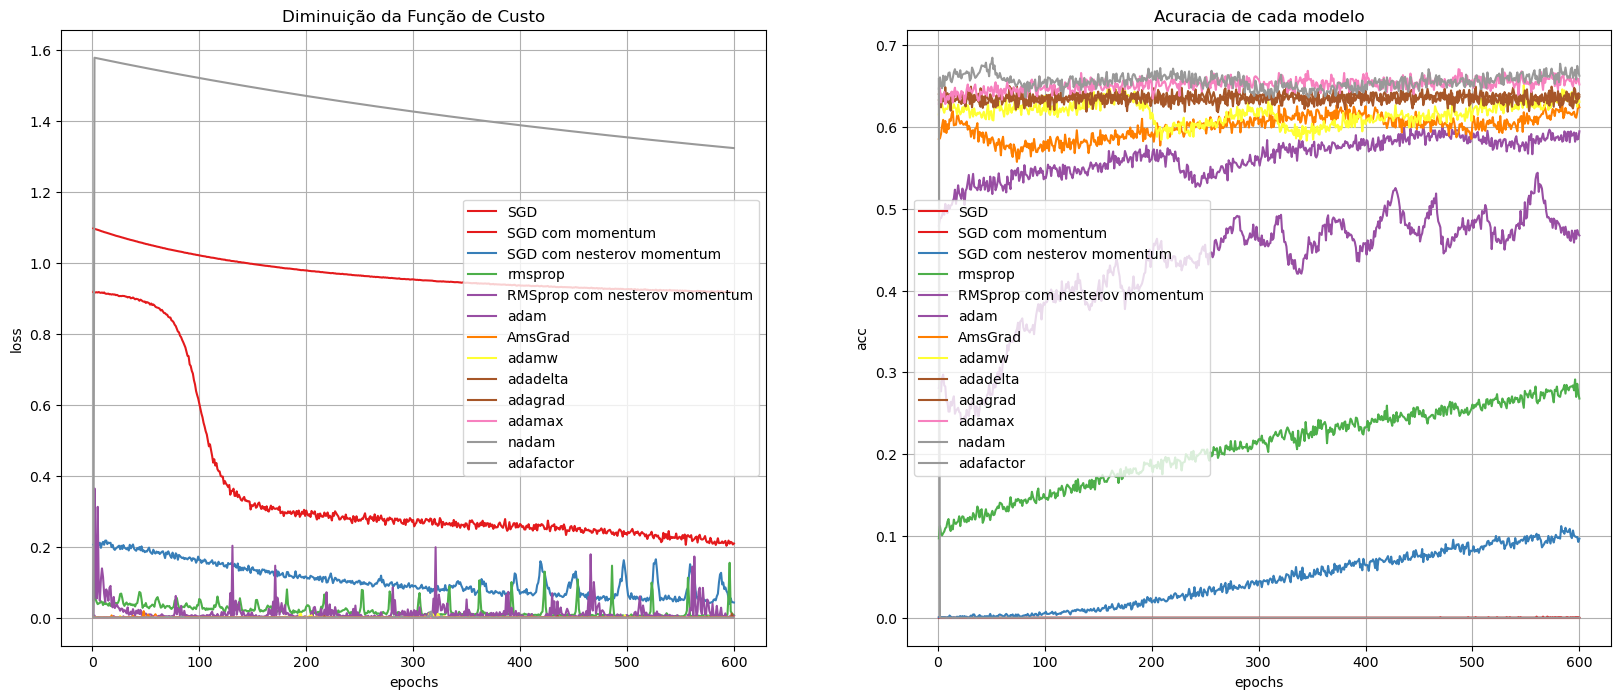

In [55]:
import matplotlib.cm as cm

colors = cm.get_cmap('Set1', len(historico))

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(20, 8))

for i, otimizador in enumerate(historico):
    ax.plot(epochs, otimizador.history['loss'], label=otimizadores[i].name, color=colors(i))
    ax.grid(True)
    ax.legend()
    ax.set_title('Diminuição da Função de Custo')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')

    ax2.plot(epochs, otimizador.history['accuracy'], label=otimizadores[i].name, color=colors(i))
    ax2.grid(True)
    ax2.legend()
    ax2.set_title('Acuracia de cada modelo')
    ax2.set_xlabel('epochs')
    ax2.set_ylabel('acc')

plt.show()

Função de custo
Acuracia

Treino/teste overfiting